In [1]:
from PIL import Image
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
DATA = "/Users/damoncrockett/Desktop/phew_hsv_crop_no-bw.csv"

In [3]:
df = pd.read_csv(DATA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865583 entries, 0 to 865582
Data columns (total 8 columns):
basename      865583 non-null object
local_path    865583 non-null object
secpast       865583 non-null int64
hue           865583 non-null float64
sat           865583 non-null float64
val           865583 non-null float64
width         865583 non-null int64
height        865583 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 52.8+ MB


In [5]:
np.mean(df.width==df.height)

1.0

In [6]:
df.width.min()

2

In [7]:
df = df[df.width>15]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811205 entries, 0 to 865570
Data columns (total 8 columns):
basename      811205 non-null object
local_path    811205 non-null object
secpast       811205 non-null int64
hue           811205 non-null float64
sat           811205 non-null float64
val           811205 non-null float64
width         811205 non-null int64
height        811205 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.7+ MB


### Plot

In [9]:
thumb_side = 16
sort_vars = ['val']

In [10]:
def cratio(nbins):
    df['xbin'] = pd.cut(df.secpast,nbins,labels=False)
    bin_max = df.groupby('xbin').size().max()
    diff = 2*np.pi - float(nbins)/bin_max
    return diff

In [11]:
import matplotlib.pyplot as plt

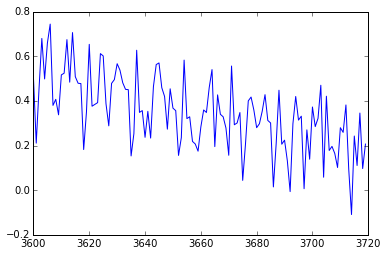

In [15]:
nbins = range(3600,3720)
cratios = [cratio(item) for item in nbins]
fig,ax = plt.subplots()
ax.plot(nbins,cratios)

In [16]:
diffs = [abs(item) for item in cratios]
mindiff = diffs.index(min(diffs))
nbins = nbins[mindiff] # this setting makes it so that the circumference and radius are appropriate

In [17]:
df['xbin'] = pd.cut(df.secpast,nbins,labels=False)
bin_max = df.groupby('xbin').size().max()

In [18]:
px_w = (bin_max * 2 * thumb_side) + thumb_side
px_h = px_w

In [19]:
print px_w, px_h

18800 18800


In [20]:
canvas = Image.new('RGB',(px_w,px_h),'hsl(180,0%,100%)')

In [21]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [22]:
def bin2phi(binn):
    incr = float(360)/nbins
    return np.radians(incr*binn)

In [23]:
def bin2phideg(binn):
    incr = float(360)/nbins
    return incr*binn

In [24]:
bins = list(set(list(df.xbin)))

In [25]:
bins.sort()

In [26]:
for item in bins:
    if np.random.binomial(1,.001)==1:
        print item
    
    tmp = df[df.xbin==item]
    tmp.sort_values(by=sort_vars,inplace=True,ascending=False)
    tmp.reset_index(drop=True,inplace=True)

    for i in range(len(tmp)):
        im = Image.open(tmp.local_path.loc[i])
        im = im.convert('RGBA')
        im.thumbnail((thumb_side,thumb_side),Image.ANTIALIAS)
        pos = bin_max - i
        xy = pol2cart(pos,bin2phi(item))
        phi = bin2phideg(item)
        im = im.rotate(phi,expand=1)
        
        xcoord = int(round((xy[0] + bin_max) * thumb_side))
        ycoord = int(round((bin_max - xy[1]) * thumb_side)) #bc high in the image is low y
        canvas.paste(im,(xcoord,ycoord),im) # tmp treated as a mask for itself

/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15
65
351
1251
1416
2050
3342


In [28]:
canvas.save("/Users/damoncrockett/Desktop/secondlook.png")